In [1]:
import numpy as np
from astropy.io import fits
# from astropy.visualization import quantity_support
from os.path import join as jp
import matplotlib.pyplot as plt

In [2]:
fits_path = '../fits'

with fits.open(jp(fits_path, 'sn.mt')) as hdul:
    hdul.info()
    hdu = hdul[0]
    head = hdu.header
    data = hdu.data

Filename: ../fits/sn.mt
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     102   (1201, 110)   float32   


In [3]:
pla = dict()

for i in np.arange(2,16):
    pla[i] = fits.open(jp(fits_path,f'pla00{i:02d}.mt'))

In [4]:
pla

{2: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f5cafc1f400>],
 3: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f5d182b6220>],
 4: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f5cafc2ef40>],
 5: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f5cafc3aa30>],
 6: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f5cafb424f0>],
 7: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f5cafb42f70>],
 8: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f5cafb52a30>],
 9: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f5cafb52910>],
 10: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f5cafb5d7f0>],
 11: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f5cafb662b0>],
 12: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f5cafb71760>],
 13: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f5cafb66220>],
 14: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f5cafb7e6a0>],
 15: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f5cafb0b160>]}

In [5]:
data.shape

(110, 1201)

In [6]:
n, start, step = head['NAXIS1'], head['CRVAL1'], head['CDELT1']
lmb = np.arange(start, start + n * step, step)

In [7]:
lmb.shape

(1201,)

In [8]:
from astropy.modeling.models import BlackBody as Planck
from astropy import units as u

In [9]:
def check_bb(lmb, data, day, T, scale=1.):
    curve = Planck(T * u.K)
    curve = curve(lmb * u.AA).to(u.erg / (u.Angstrom * u.s * u.sr * u.cm**2), equivalencies=u.spectral_density(lmb * u.Angstrom))
    fig, ax = plt.subplots()
    ax.plot(lmb,data[day-1])
    ax.plot(lmb,scale*curve/1e7)

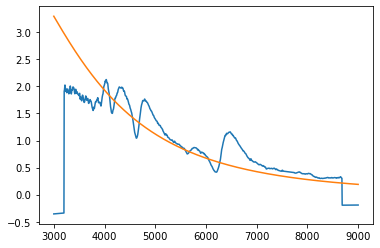

In [10]:
check_bb(lmb, data, 2, 14000, 0.2)

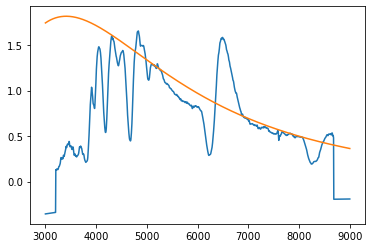

In [11]:
check_bb(lmb, data, 5, 8500, 1.)

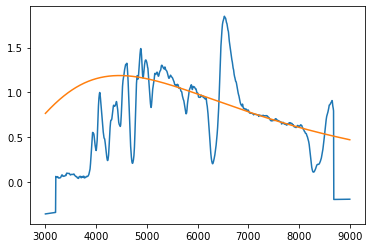

In [12]:
check_bb(lmb, data, 10, 6500, scale=2.5)

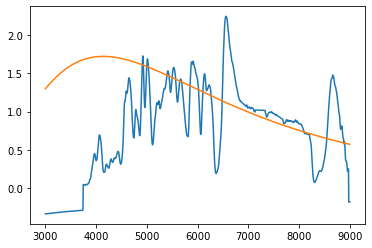

In [13]:
check_bb(lmb, data, 20, 7000, scale=2.5)

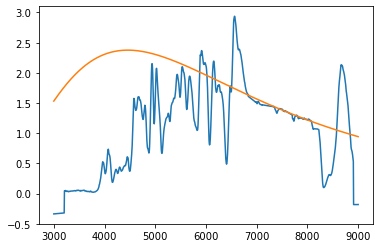

In [14]:
check_bb(lmb, data, 30, 6500, scale=5)

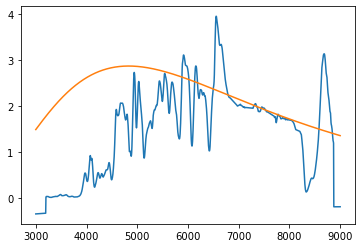

In [15]:
check_bb(lmb, data, 40, 6000, scale=9)

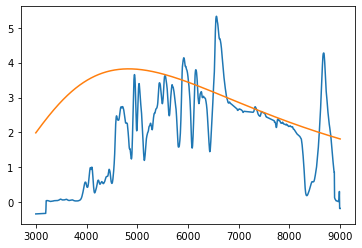

In [16]:
check_bb(lmb, data, 50, 6000, scale=12)

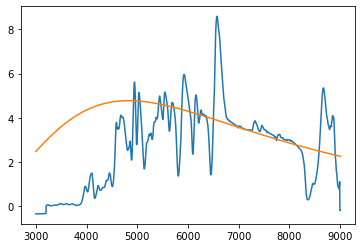

In [17]:
check_bb(lmb, data, 70, 6000, scale=15)

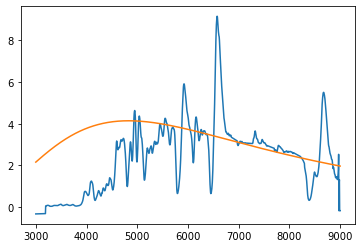

In [18]:
check_bb(lmb, data, 100, 6000, scale=13)

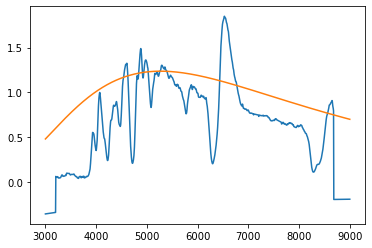

In [26]:
check_bb(lmb, data, 10, 5500, scale=6)